In [83]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

# Analysis w/o time cut (*on SlicedDetections*)

In [3]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Neutrons_Sliced")

fileinprefix = "SlicedDetections*WholeCylinder*.csv"
df_ar41_wholecylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.columns[:-1]]

fileinprefix = "SlicedDetections*RestrictedCylinder*.csv"
df_ar41_ROIcylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.columns[:-1]]

fileinprefix = "SlicedDetections*100mmCylinder_S*.csv"
df_ar41_100cylinder = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.columns[:-1]]

fileinprefix = "SlicedDetections*100mmCylinder_01MeV*.csv"
df_ar41_100cylinder_01Mev = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.columns[:-1]]

[Info] Loading 1 files wt prefix:
SlicedDetections*WholeCylinder*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*RestrictedCylinder*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_S*.csv

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_01MeV*.csv



In [4]:
nevents_detected_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.pedetected>0].eventnumber.nunique()
nevents_detected_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.pedetected>0].eventnumber.nunique()
nevents_detected_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.pedetected>0].eventnumber.nunique()
nevents_detected_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.pedetected>0].eventnumber.nunique()

In [5]:
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("whole", "0-7 MeV", nevents_detected_wholecylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("ROI", "0-20 MeV", nevents_detected_ROIcylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-20 MeV", nevents_detected_100cylinder))
print("[Info] Sampling: cylinder: {}, energy: {} => Number of detected events: {}".format("100mm", "0-1 MeV", nevents_detected_100cylinder_01Mev))

[Info] Sampling: cylinder: whole, energy: 0-7 MeV => Number of detected events: 3208
[Info] Sampling: cylinder: ROI, energy: 0-20 MeV => Number of detected events: 15108
[Info] Sampling: cylinder: 100mm, energy: 0-20 MeV => Number of detected events: 22881
[Info] Sampling: cylinder: 100mm, energy: 0-1 MeV => Number of detected events: 16681


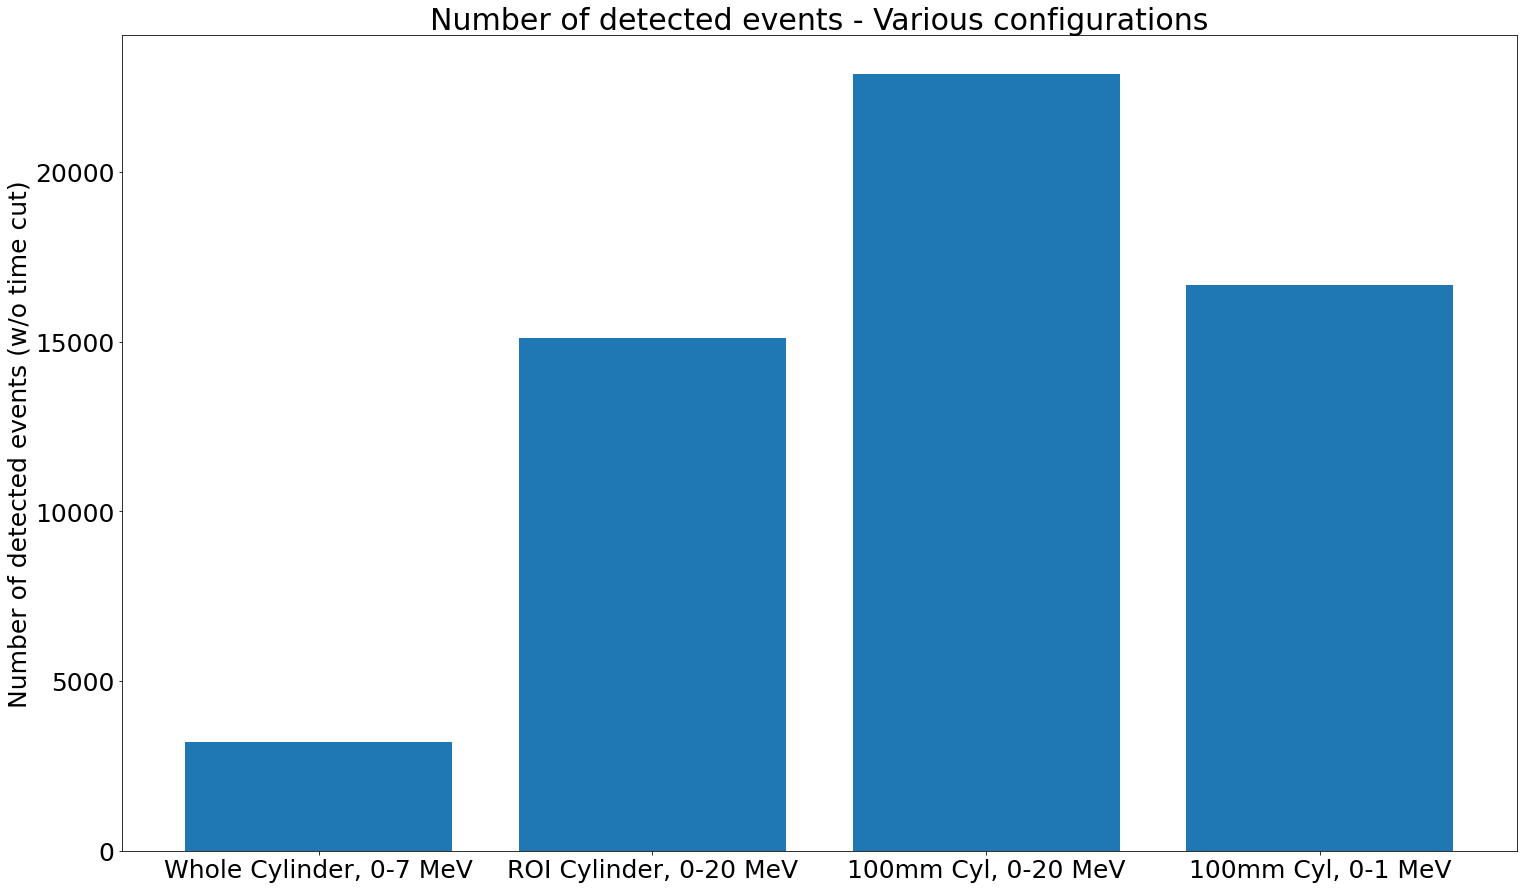

In [6]:
plt.bar([1, 2, 3, 4], [nevents_detected_wholecylinder, 
                       nevents_detected_ROIcylinder,
                       nevents_detected_100cylinder,
                       nevents_detected_100cylinder_01Mev])
plt.xticks([1, 2, 3, 4], ["Whole Cylinder, 0-7 MeV",
                          "ROI Cylinder, 0-20 MeV",
                          "100mm Cyl, 0-20 MeV",
                          "100mm Cyl, 0-1 MeV",])
plt.title("Number of detected events - Various configurations")
plt.ylabel("Number of detected events (w/o time cut)")
plt.show()

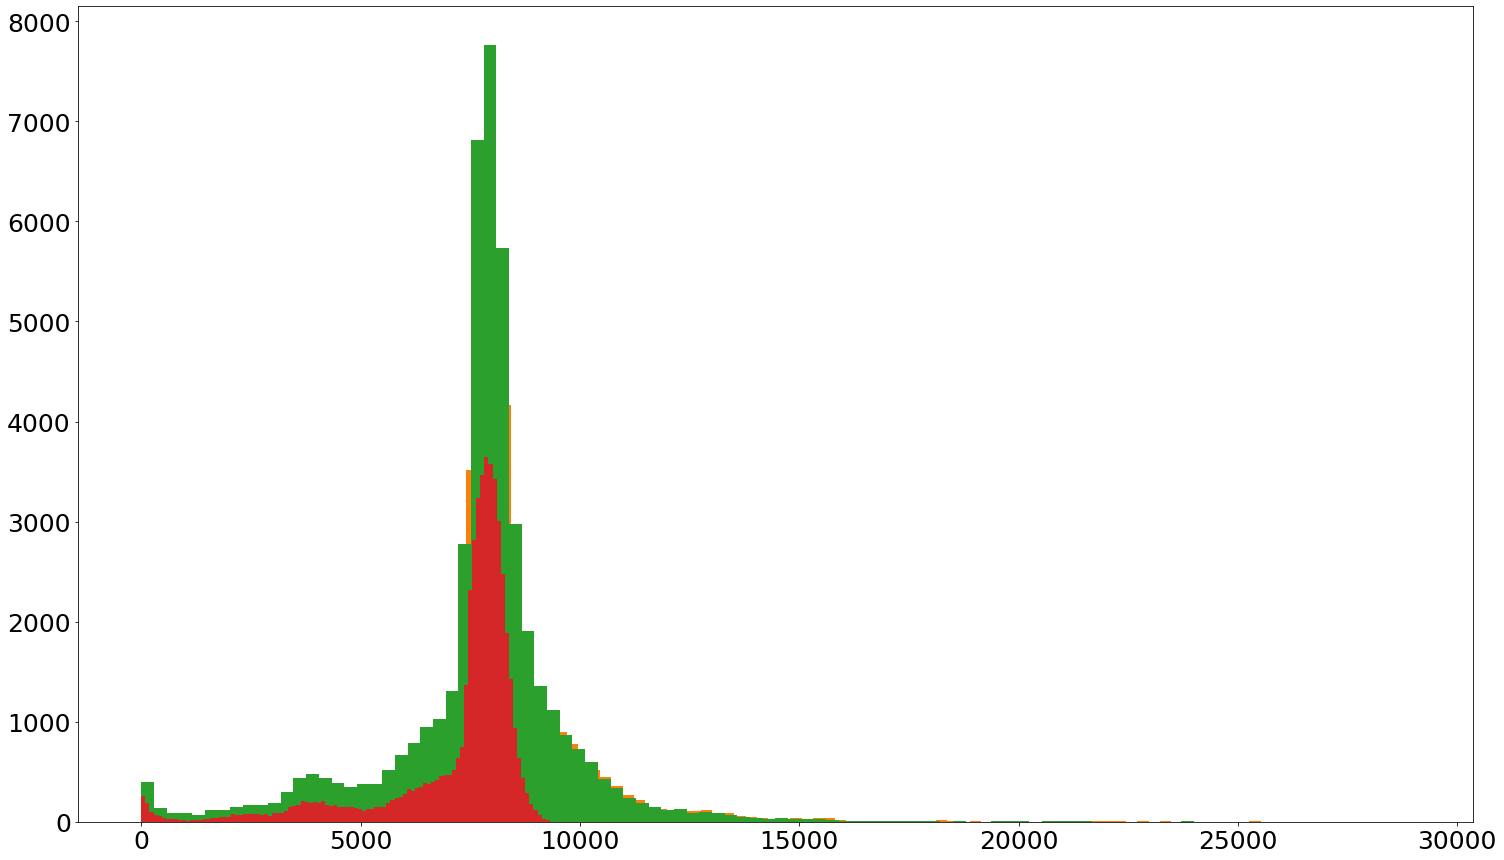

In [13]:
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum(), bins=100)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum(), bins=100)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum(), bins=100)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum(), bins=100)

plt.show()

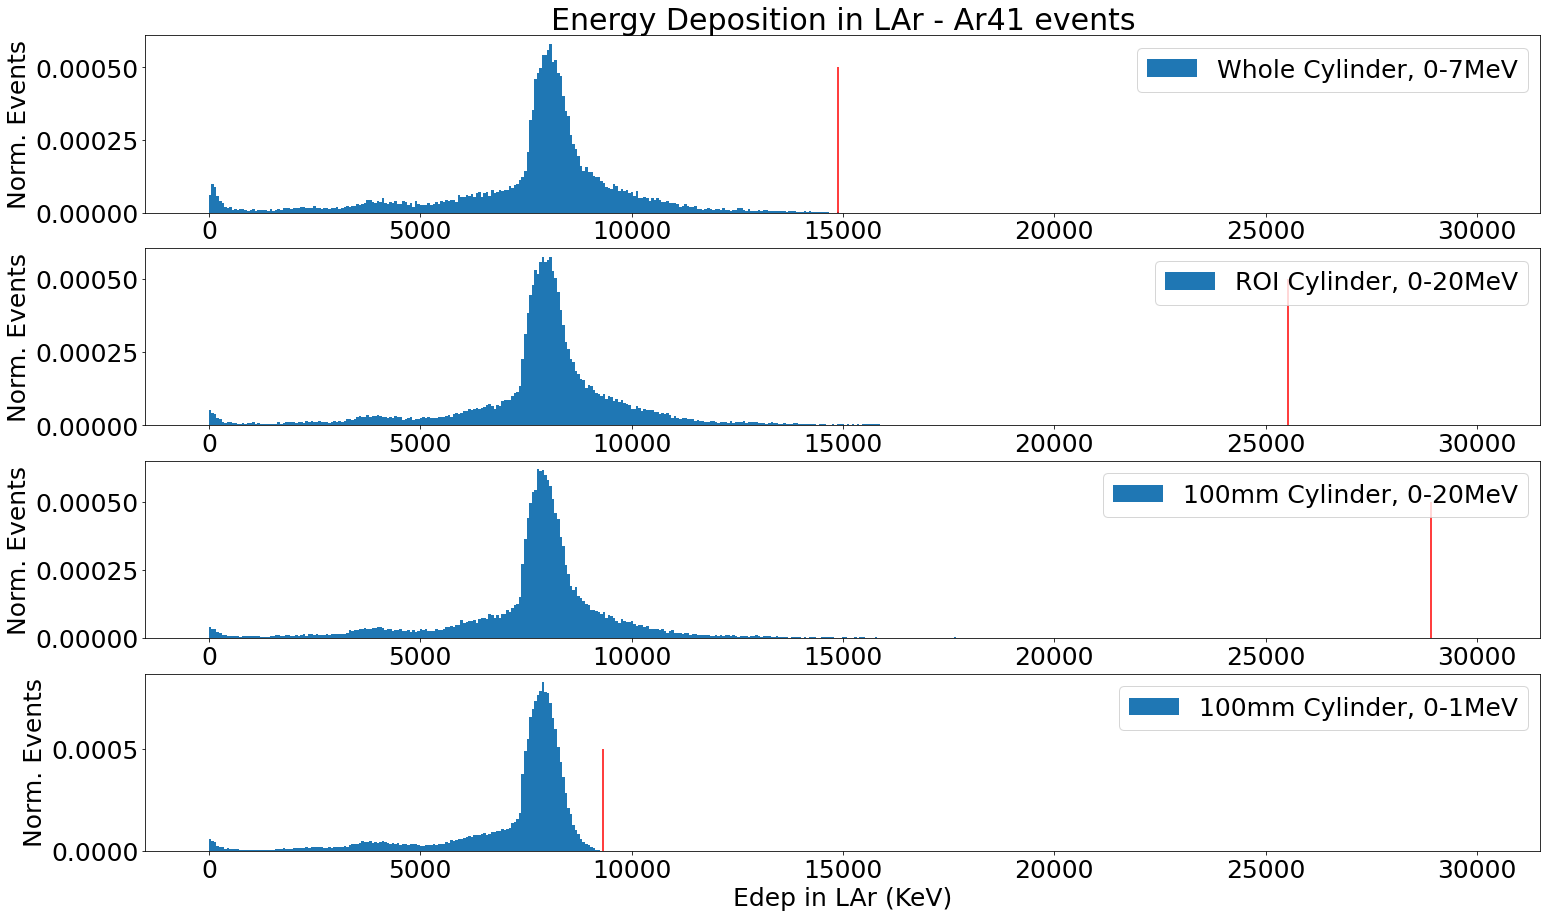

In [25]:
bins = np.linspace(0, 30000, 500)
alpha=1
plt.subplot(4, 1, 1)
plt.title("Energy Deposition in LAr - Ar41 events")
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="Whole Cylinder, 0-7MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_wholecylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(4, 1, 2)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="ROI Cylinder, 0-20MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_ROIcylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(4, 1, 3)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum(), bins=bins, label="100mm Cylinder, 0-20MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_100cylinder.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.subplot(4, 1, 4)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum(), bins=bins, label="100mm Cylinder, 0-1MeV", alpha=alpha, density=True)
plt.vlines(df_ar41_100cylinder_01Mev.groupby("eventnumber").energydeposition.sum().max(), 0, .0005, color='r')
plt.legend()
plt.ylabel("Norm. Events")
plt.xlabel("Edep in LAr (KeV)")

plt.show()

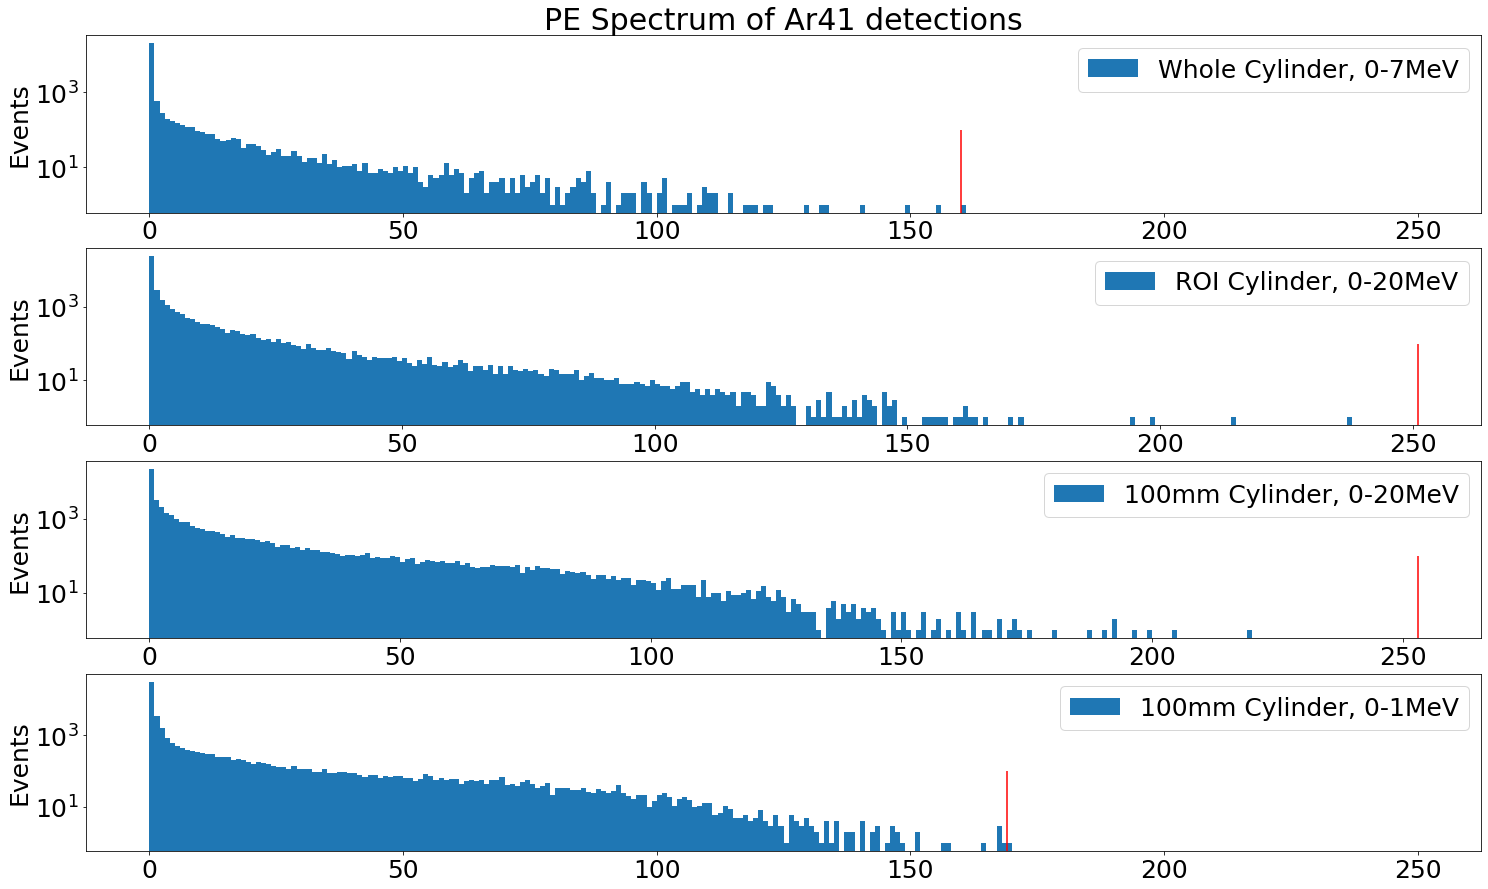

In [26]:
bins = np.linspace(0, 250, 251)
alpha=1
plt.subplot(4, 1, 1)
plt.title("PE Spectrum of Ar41 detections")
plt.hist(df_ar41_wholecylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="Whole Cylinder, 0-7MeV", alpha=alpha)
plt.vlines(df_ar41_wholecylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(4, 1, 2)
plt.hist(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="ROI Cylinder, 0-20MeV", alpha=alpha)
plt.vlines(df_ar41_ROIcylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(4, 1, 3)
plt.hist(df_ar41_100cylinder.groupby("eventnumber").pedetected.sum(), bins=bins, label="100mm Cylinder, 0-20MeV", alpha=alpha)
plt.vlines(df_ar41_100cylinder.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")

plt.subplot(4, 1, 4)
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum(), bins=bins, label="100mm Cylinder, 0-1MeV", alpha=alpha)
plt.vlines(df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum().max(), 0, 100, color='r')
plt.legend()
plt.yscale("log")
plt.ylabel("Events")
plt.show()

In [34]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyar41_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
df_onlyar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==1000180410].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyar41_wholecylinder = (df_onlyar41_wholecylinder.x**2 + df_onlyar41_wholecylinder.y**2 + df_onlyar41_wholecylinder.z**2)**.5
radius_onlyar41_ROIcylinder = (df_onlyar41_ROIcylinder.x**2 + df_onlyar41_ROIcylinder.y**2 + df_onlyar41_ROIcylinder.z**2)**.5
radius_onlyar41_100cylinder = (df_onlyar41_100cylinder.x**2 + df_onlyar41_100cylinder.y**2 + df_onlyar41_100cylinder.z**2)**.5
radius_onlyar41_100cylinder_01Mev = (df_onlyar41_100cylinder_01Mev.x**2 + df_onlyar41_100cylinder_01Mev.y**2 + df_onlyar41_100cylinder_01Mev.z**2)**.5

In [64]:
# Select 1st step of Ar41 particles (production step) for each event
df_onlyNe_wholecylinder = df_ar41_wholecylinder[df_ar41_wholecylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_ROIcylinder = df_ar41_ROIcylinder[df_ar41_ROIcylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_100cylinder = df_ar41_100cylinder[df_ar41_100cylinder.PID==2112].groupby(["eventnumber"]).first().reset_index()
df_onlyNe_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==2112].groupby(["eventnumber"]).first().reset_index()
# compute the radial distance of the production point
radius_onlyNe_wholecylinder = (df_onlyNe_wholecylinder.x**2 + df_onlyNe_wholecylinder.y**2 + df_onlyNe_wholecylinder.z**2)**.5
radius_onlyNe_ROIcylinder = (df_onlyNe_ROIcylinder.x**2 + df_onlyNe_ROIcylinder.y**2 + df_onlyNe_ROIcylinder.z**2)**.5
radius_onlyNe_100cylinder = (df_onlyNe_100cylinder.x**2 + df_onlyNe_100cylinder.y**2 + df_onlyNe_100cylinder.z**2)**.5
radius_onlyNe_100cylinder_01Mev = (df_onlyNe_100cylinder_01Mev.x**2 + df_onlyNe_100cylinder_01Mev.y**2 + df_onlyNe_100cylinder_01Mev.z**2)**.5

In [40]:
radius_onlyar41_wholecylinder.describe()

count    23554.000000
mean      2443.808428
std       4408.789761
min         85.345029
25%       1305.079987
50%       1711.641305
75%       2024.053369
max      34191.187064
dtype: float64

In [41]:
radius_onlyar41_ROIcylinder.describe()

count    38549.000000
mean      1880.686298
std       3390.238747
min         21.116085
25%        982.860923
50%       1461.981747
75%       1881.005584
max      34359.131889
dtype: float64

In [42]:
radius_onlyar41_100cylinder.describe()

count    44999.000000
mean      1764.638654
std       3210.640089
min          9.907543
25%        887.756568
50%       1424.827296
75%       1866.960201
max      34267.632451
dtype: float64

In [43]:
radius_onlyar41_100cylinder_01Mev.describe()

count    48805.000000
mean      1724.012651
std       3029.504898
min          4.710611
25%        899.739854
50%       1432.683272
75%       1870.192637
max      34320.503705
dtype: float64

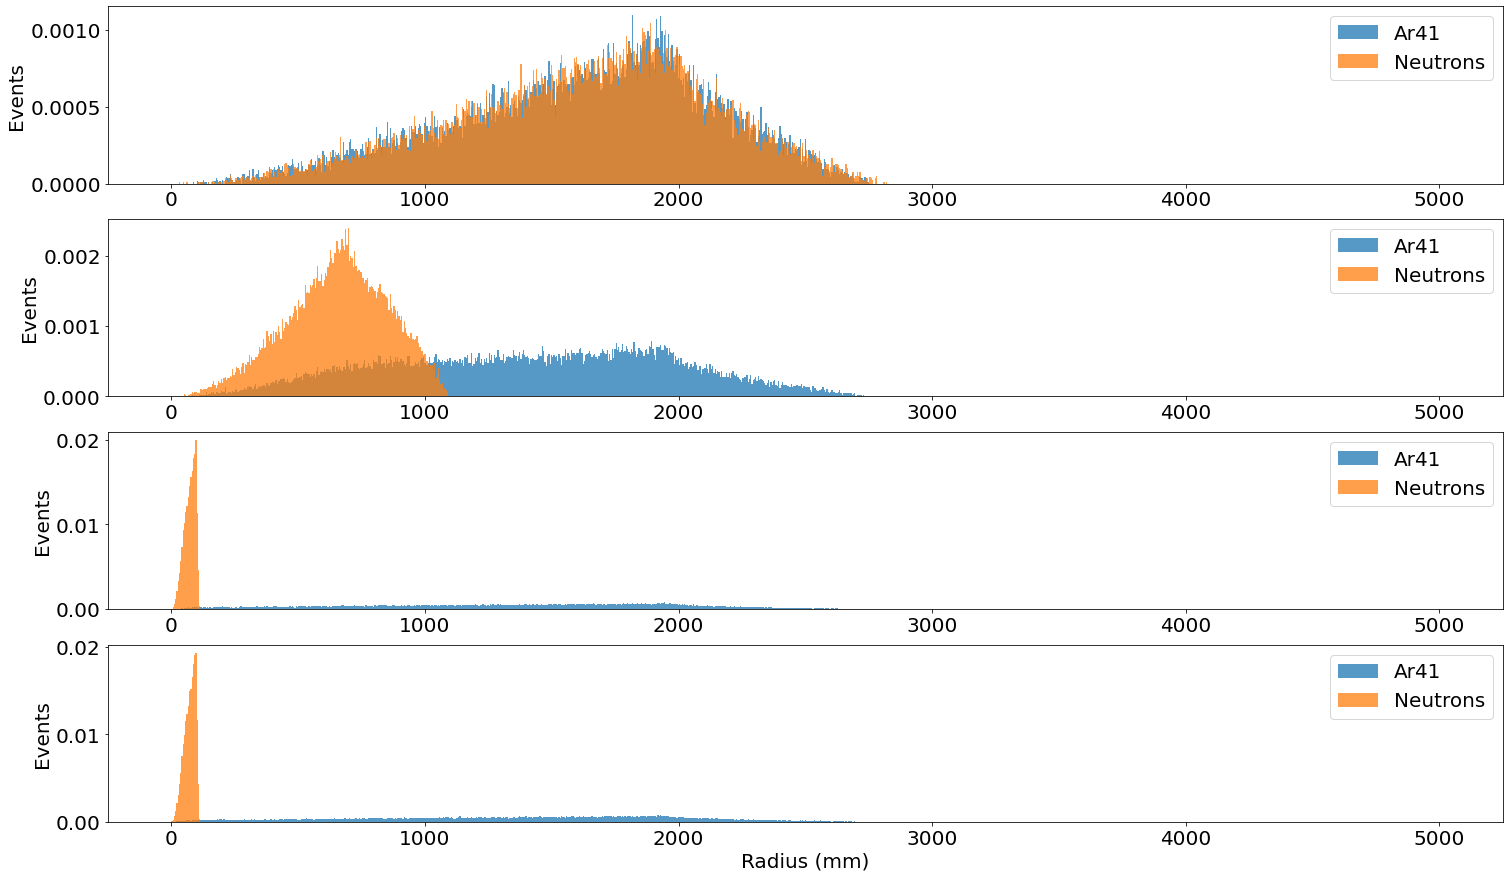

In [87]:
bins = np.linspace(0, 5000, 1000)
alpha=.75
plt.subplot(4, 1, 1)
#plt.title("Whole Cylinder, 0-7MeV")
plt.hist(radius_onlyar41_wholecylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_wholecylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(4, 1, 2)
#plt.title("ROI Cylinder, 0-20MeV")
plt.hist(radius_onlyar41_ROIcylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_ROIcylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(4, 1, 3)
#plt.title("100mm Cylinder, 0-20MeV")
plt.hist(radius_onlyar41_100cylinder, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_100cylinder, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.ylabel("Events")

plt.subplot(4, 1, 4)
#plt.title("100mm Cylinder, 0-1MeV")
plt.hist(radius_onlyar41_100cylinder_01Mev, bins=bins, label="Ar41", alpha=alpha, density=True)
plt.hist(radius_onlyNe_100cylinder_01Mev, bins=bins, label="Neutrons", alpha=alpha, density=True)
plt.legend()
plt.xlabel("Radius (mm)")
plt.ylabel("Events")
plt.show()


In [74]:
radius_onlyar41_wholecylinder.describe()

count    23554.000000
mean      2443.808428
std       4408.789761
min         85.345029
25%       1305.079987
50%       1711.641305
75%       2024.053369
max      34191.187064
dtype: float64

In [75]:
radius_onlyNe_wholecylinder.describe()

count    23554.000000
mean      1631.125008
std        499.122718
min         34.585154
25%       1298.259351
50%       1681.148564
75%       1987.667574
max       2822.496580
dtype: float64

In [55]:
df_ar41_100cylinder[(df_ar41_100cylinder.PID==2112)].groupby("eventnumber").first().r.describe()

count    44999.000000
mean        66.741597
std         23.622103
min          0.259339
25%         49.828025
50%         70.925132
75%         86.703367
max         99.998471
Name: r, dtype: float64

In [58]:
df_ar41_100cylinder[df_ar41_100cylinder.PID==1000180410].r.describe()

count    90001.000000
mean      1363.184285
std       2662.375124
min          1.354141
25%        586.306579
50%       1048.651660
75%       1523.672401
max      28231.652818
Name: r, dtype: float64

In [59]:
df_ar41_wholecylinder[df_ar41_wholecylinder.PID==1000180410].r.describe()

count    47108.000000
mean      1890.292442
std       3611.168957
min          4.485555
25%        893.719844
50%       1328.987188
75%       1684.737590
max      28279.319884
Name: r, dtype: float64

In [63]:
df_ar41_100cylinder_01Mev.eventnumber.nunique()

48805